# Working with Batch and Stochastic Training

While TensorFlow updates our model variables according to the prior described back propagation, it can operate on anywhere from one datum observation to a large group of data at once. Operating on one training example can make for a very erratic learning process, while using a too large batch can be computationally expensive. Choosing the right type of training is crucial to getting our machine learning algorithms to converge to a solution.

In [257]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [389]:
SAMPLE_SIZE = 100
ITERATION = 300
COLLECT_SIZE = 50
COLLECT_INTERVAL = ITERATION // COLLECT_SIZE
LOG_LINES = 10
LOG_INTERVAL = ITERATION // LOG_LINES

print(COLLECT_INTERVAL)
print(LOG_INTERVAL)

6
30


In [390]:
x_data = np.random.normal(loc=1.5, scale=0.2, size=SAMPLE_SIZE)
y_data = np.vectorize(lambda x: x * -0.872 + np.random.normal(loc=0.5, scale=0.1))(x_data)

print(x_data[: 4])
print(y_data[: 4])

[ 1.6560607   1.39879203  1.29655156  1.22609111]
[-0.9563191  -0.7369249  -0.72323394 -0.59164583]


In [391]:
def train(batch_size):
    ops.reset_default_graph()
    sess = tf.Session()
    
    x = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='x')
    y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='y')
    w = tf.Variable([0.], name='w')
    b = tf.Variable([0.], name='b')

    output = tf.add(tf.multiply(x, w), b, name='output')
    loss = tf.reduce_mean(tf.square(output - y))
    optimizer = tf.train.GradientDescentOptimizer(0.001)
    train = optimizer.minimize(loss)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    losses = []
    for i in range(ITERATION):
        idx = np.random.choice(SAMPLE_SIZE, size=batch_size, replace=False)
        x_rand = np.expand_dims(a=x_data[idx], axis=1)
        y_rand = np.expand_dims(a=y_data[idx], axis=1)
        feed_dict = {x: x_rand, y: y_rand}
        sess.run(train, feed_dict=feed_dict)
        
        if (i + 1) % COLLECT_INTERVAL == 0:
            loss_res = sess.run(loss, feed_dict=feed_dict)
            losses.append(loss_res)
            
        if (i + 1) % LOG_INTERVAL == 0:
            (w_res, b_res, loss_res) = sess.run((w, b, loss), feed_dict=feed_dict)
            print('#{}: w = {} b = {} loss = {}'.format(i + 1, w_res, b_res, loss_res))
            
    return losses

In [392]:
losses_1 = train(1)

#30: w = [-0.06651859] b = [-0.04328135] loss = 0.8936925530433655
#60: w = [-0.1277961] b = [-0.08216224] loss = 0.30402955412864685
#90: w = [-0.17743646] b = [-0.11345675] loss = 0.33071526885032654
#120: w = [-0.21317415] b = [-0.13573785] loss = 0.03515560179948807
#150: w = [-0.23864044] b = [-0.15233743] loss = 0.010746875777840614
#180: w = [-0.27155676] b = [-0.17280811] loss = 0.19090105593204498
#210: w = [-0.2912896] b = [-0.18541008] loss = 0.15277332067489624
#240: w = [-0.31172812] b = [-0.19800217] loss = 0.03200836852192879
#270: w = [-0.32725748] b = [-0.20702028] loss = 0.11366049945354462
#300: w = [-0.33315432] b = [-0.21026348] loss = 0.0011333483271300793


In [393]:
losses_2 = train(SAMPLE_SIZE // 10)

#30: w = [-0.06929892] b = [-0.04469509] loss = 0.7376285791397095
#60: w = [-0.12742445] b = [-0.0819002] loss = 0.49431100487709045
#90: w = [-0.17465697] b = [-0.11196417] loss = 0.24869343638420105
#120: w = [-0.21224222] b = [-0.13588434] loss = 0.15563172101974487
#150: w = [-0.24198085] b = [-0.15480955] loss = 0.09462175518274307
#180: w = [-0.26693657] b = [-0.17054169] loss = 0.12108800560235977
#210: w = [-0.28816992] b = [-0.18379983] loss = 0.07692097127437592
#240: w = [-0.30548882] b = [-0.19431922] loss = 0.04935475438833237
#270: w = [-0.32090956] b = [-0.2036127] loss = 0.055066414177417755
#300: w = [-0.3329154] b = [-0.21063416] loss = 0.042735565453767776


In [394]:
losses_3 = train(SAMPLE_SIZE)

#30: w = [-0.06854637] b = [-0.04427792] loss = 0.4821949005126953
#60: w = [-0.12489992] b = [-0.08052512] loss = 0.33255013823509216
#90: w = [-0.17124209] b = [-0.11017852] loss = 0.2316579818725586
#120: w = [-0.2093641] b = [-0.13441795] loss = 0.16363359987735748
#150: w = [-0.24073663] b = [-0.15421219] loss = 0.11776771396398544
#180: w = [-0.26656729] b = [-0.17035668] loss = 0.0868404284119606
#210: w = [-0.28784755] b = [-0.18350451] loss = 0.06598439812660217
#240: w = [-0.30539152] b = [-0.19419187] loss = 0.051918137818574905
#270: w = [-0.31986758] b = [-0.2028591] loss = 0.04242938384413719
#300: w = [-0.33182463] b = [-0.20986776] loss = 0.036026645451784134


<IPython.core.display.Javascript object>


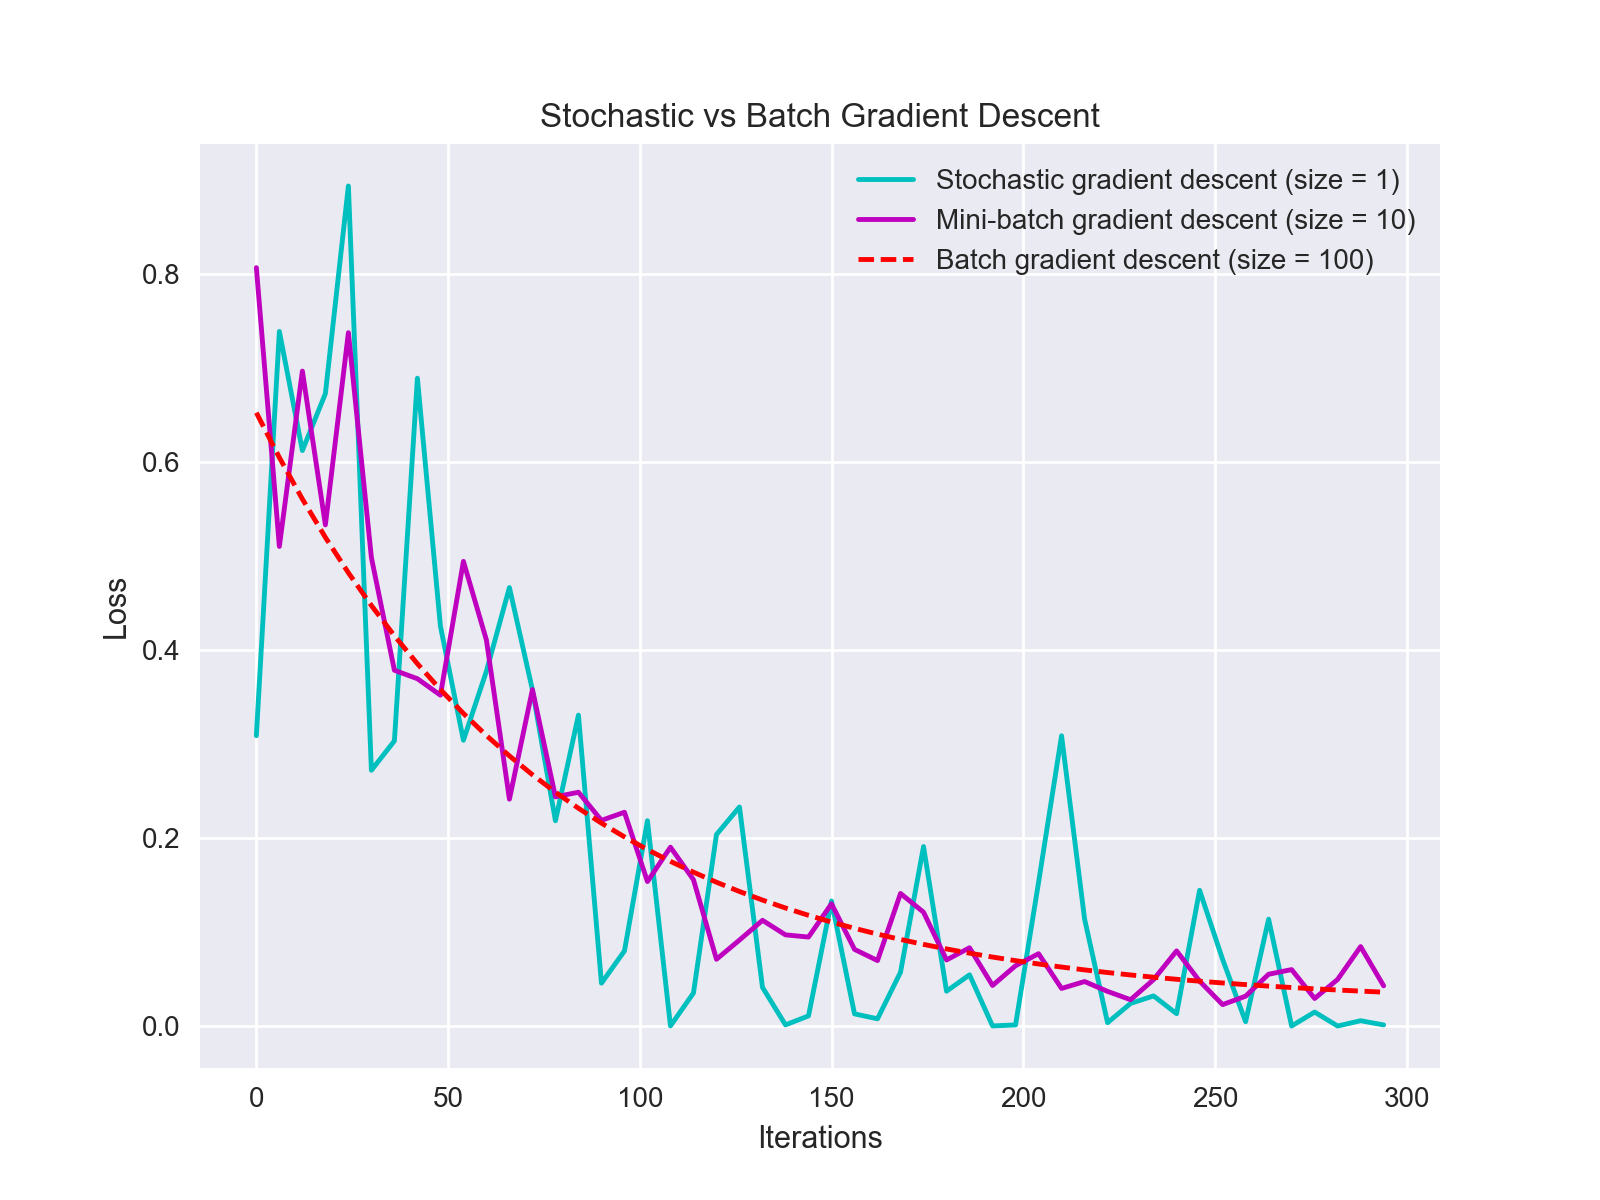

In [397]:
x_range = range(0, ITERATION, COLLECT_INTERVAL)
plt.figure(figsize=(8, 6))
plt.plot(x_range, losses_1, 'c', label='Stochastic gradient descent (size = 1)')
plt.plot(x_range, losses_2, 'm', label='Mini-batch gradient descent (size = 10)')
plt.plot(x_range, losses_3, 'r--', label='Batch gradient descent (size = 100)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Stochastic vs Batch Gradient Descent')
plt.show()